In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

1. Data Loading and Exploration

In [20]:
# Load the dataset
try:
    df = pd.read_csv('vgchartz-2024.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    # Create a sample DataFrame for demonstration (in case the file is not found)
    df = pd.DataFrame({
        'title': ['Game1', 'Game2', 'Game3'],
        'console': ['PS4', 'Xbox', 'Switch'],
        'genre': ['Action', 'Sports', 'RPG'],
        'total_sales': [5.2, 3.7, 4.1],
        'release_date': ['2020-01-01', '2021-02-15', '2019-11-30']
    })

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (64016, 14)

First 5 rows:


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [21]:
# Check dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [22]:
# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing values per column:
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [23]:
# Basic statistics for numerical columns
print("Basic statistics for numerical columns:")
df.describe()

Basic statistics for numerical columns:


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


2. Data Cleaning

In [24]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Fill missing critic scores with the median
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

# Fill missing regional sales with 0
df['jp_sales'] = df['jp_sales'].fillna(0)
df['pal_sales'] = df['pal_sales'].fillna(0)
df['other_sales'] = df['other_sales'].fillna(0)

# Check if cleaning was successful
print("Missing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after cleaning:
developer          17
total_sales     45094
na_sales        51379
release_date     7051
last_update     46137
release_year     7051
dtype: int64


In [25]:
# Drop rows with missing release_year (only 1 row)
df = df.dropna(subset=['release_year'])

3. Basic Data Analysis

In [26]:
# Top 10 best-selling games
top_games = df.nlargest(10, 'total_sales')[['title', 'console', 'total_sales', 'release_year']]
print("Top 10 best-selling games:")
top_games

Top 10 best-selling games:


,title,console,total_sales,release_year
0,Grand Theft Auto V,PS3,20.32,2013.0
1,Grand Theft Auto V,PS4,19.39,2014.0
2,Grand Theft Auto: Vice City,PS2,16.15,2002.0
3,Grand Theft Auto V,X360,15.86,2013.0
4,Call of Duty: Black Ops 3,PS4,15.09,2015.0
5,Call of Duty: Modern Warfare 3,X360,14.82,2011.0
6,Call of Duty: Black Ops,X360,14.74,2010.0
7,Red Dead Redemption 2,PS4,13.94,2018.0
8,Call of Duty: Black Ops II,X360,13.86,2012.0
9,Call of Duty: Black Ops II,PS3,13.80,2012.0


In [27]:
# Sales by genre
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Total sales by genre:")
genre_sales

Total sales by genre:


genre
Sports              1186.77
Action              1124.95
Shooter              995.47
Misc                 557.55
Racing               523.51
Role-Playing         425.88
Platform             349.15
Fighting             340.39
Adventure            325.09
Simulation           300.48
Action-Adventure     148.52
Puzzle               127.06
Strategy             118.26
Music                 51.75
MMO                    9.31
Party                  6.21
Visual Novel           5.78
Sandbox                1.89
Education              0.97
Board Game             0.33
Name: total_sales, dtype: float64

In [28]:
# Sales by console
console_sales = df.groupby('console')['total_sales'].sum().sort_values(ascending=False)
print("Total sales by console:")
console_sales.head(10)  # Showing top 10 only

Total sales by console:


console
PS2     1025.38
X360     859.41
PS3      839.01
PS       546.21
PS4      539.92
Wii      458.92
DS       457.77
XOne     268.96
PSP      244.74
XB       232.05
Name: total_sales, dtype: float64

In [29]:
# Correlation between critic score and sales
correlation = df['critic_score'].corr(df['total_sales'])
print(f"Correlation between critic score and total sales: {correlation:.3f}")

Correlation between critic score and total sales: 0.162


4. Data Visualizations


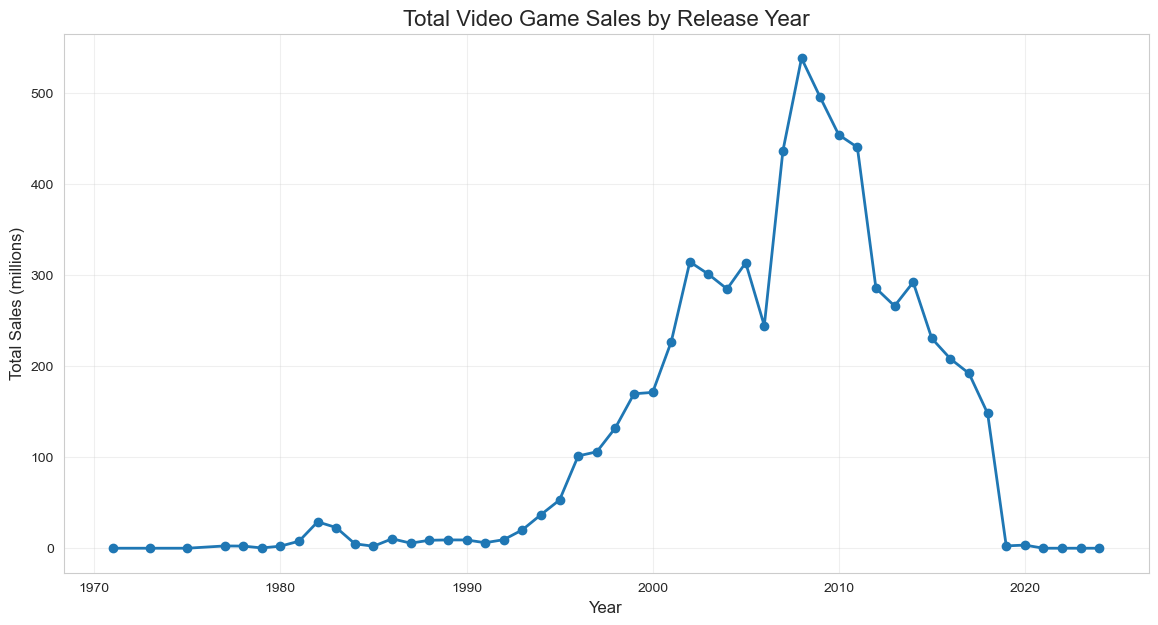

In [30]:
# 1. Line chart - Sales trends over time
plt.figure(figsize=(14, 7))
yearly_sales = df.groupby('release_year')['total_sales'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=2)
plt.title('Total Video Game Sales by Release Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

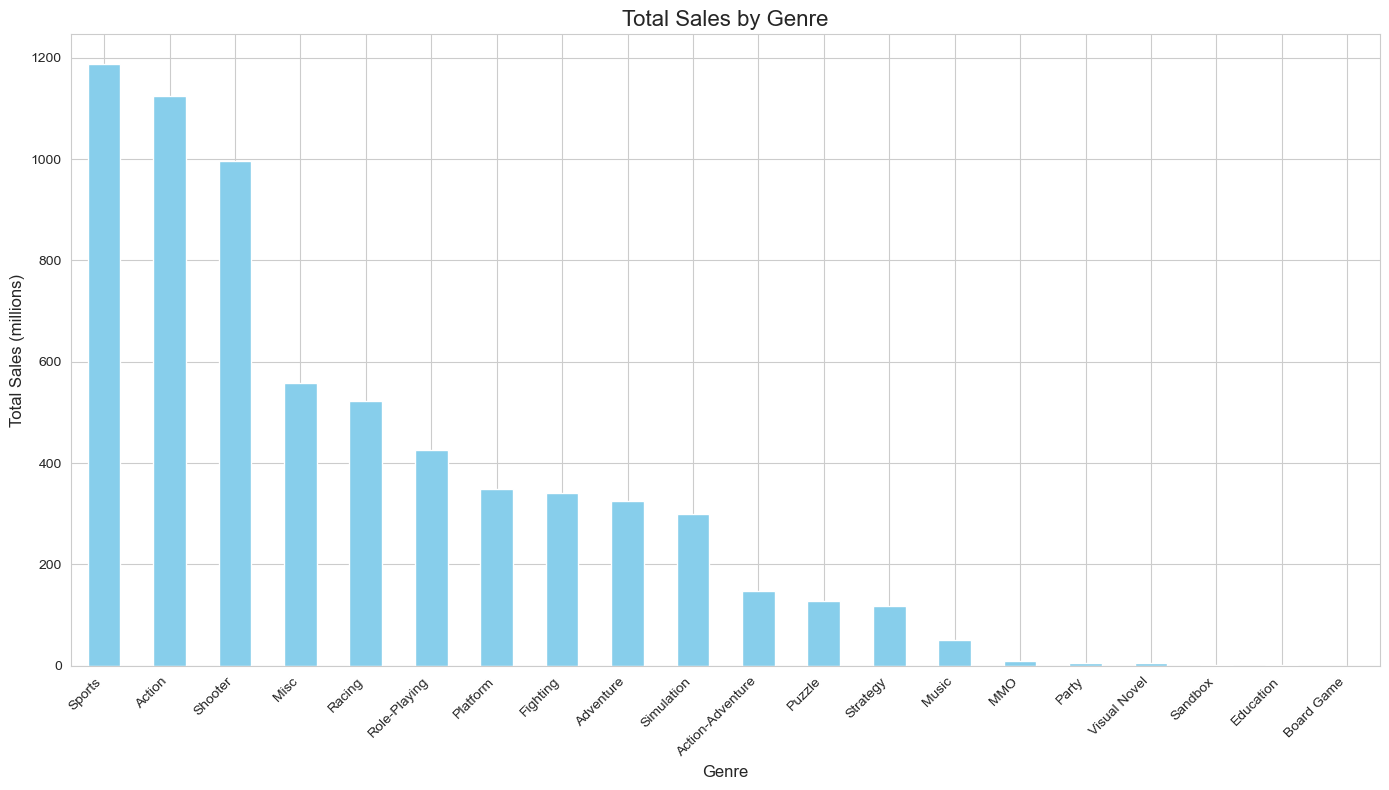

In [31]:
# 2. Bar chart - Sales by genre
plt.figure(figsize=(14, 8))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

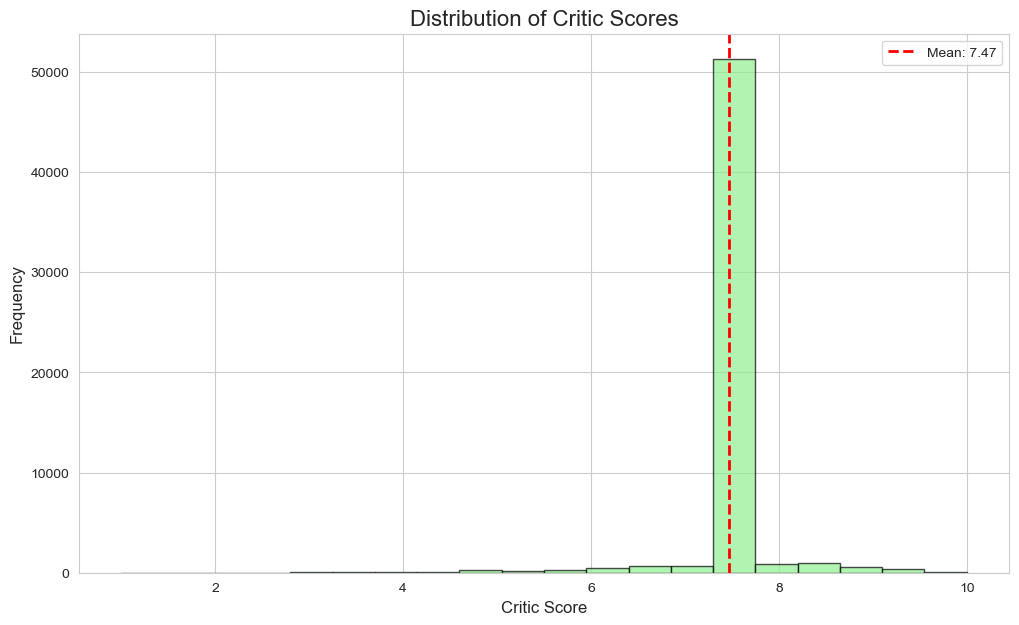

In [32]:
# 3. Histogram - Distribution of critic scores
plt.figure(figsize=(12, 7))
plt.hist(df['critic_score'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Critic Scores', fontsize=16)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['critic_score'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["critic_score"].mean():.2f}')
plt.legend()
plt.show()

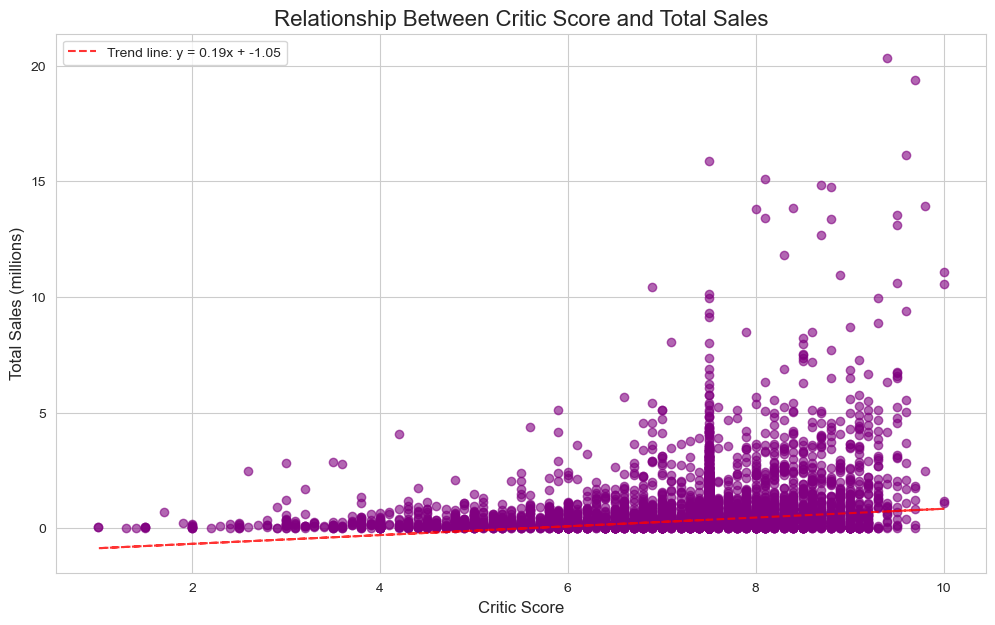

In [33]:
# 4. Scatter plot - Critic score vs Total sales (with error handling)
plt.figure(figsize=(12, 7))

# Filter out any potential NaN values just for this plot
valid_data = df[['critic_score', 'total_sales']].dropna()

plt.scatter(valid_data['critic_score'], valid_data['total_sales'], alpha=0.6, color='purple')
plt.title('Relationship Between Critic Score and Total Sales', fontsize=16)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)

# Add trend line with error handling
try:
    z = np.polyfit(valid_data['critic_score'], valid_data['total_sales'], 1)
    p = np.poly1d(z)
    plt.plot(valid_data['critic_score'], p(valid_data['critic_score']), "r--", alpha=0.8, 
             label=f'Trend line: y = {z[0]:.2f}x + {z[1]:.2f}')
    plt.legend()
except np.linalg.LinAlgError:
    print("Warning: Could not calculate trend line due to numerical issues.")
    
plt.show()

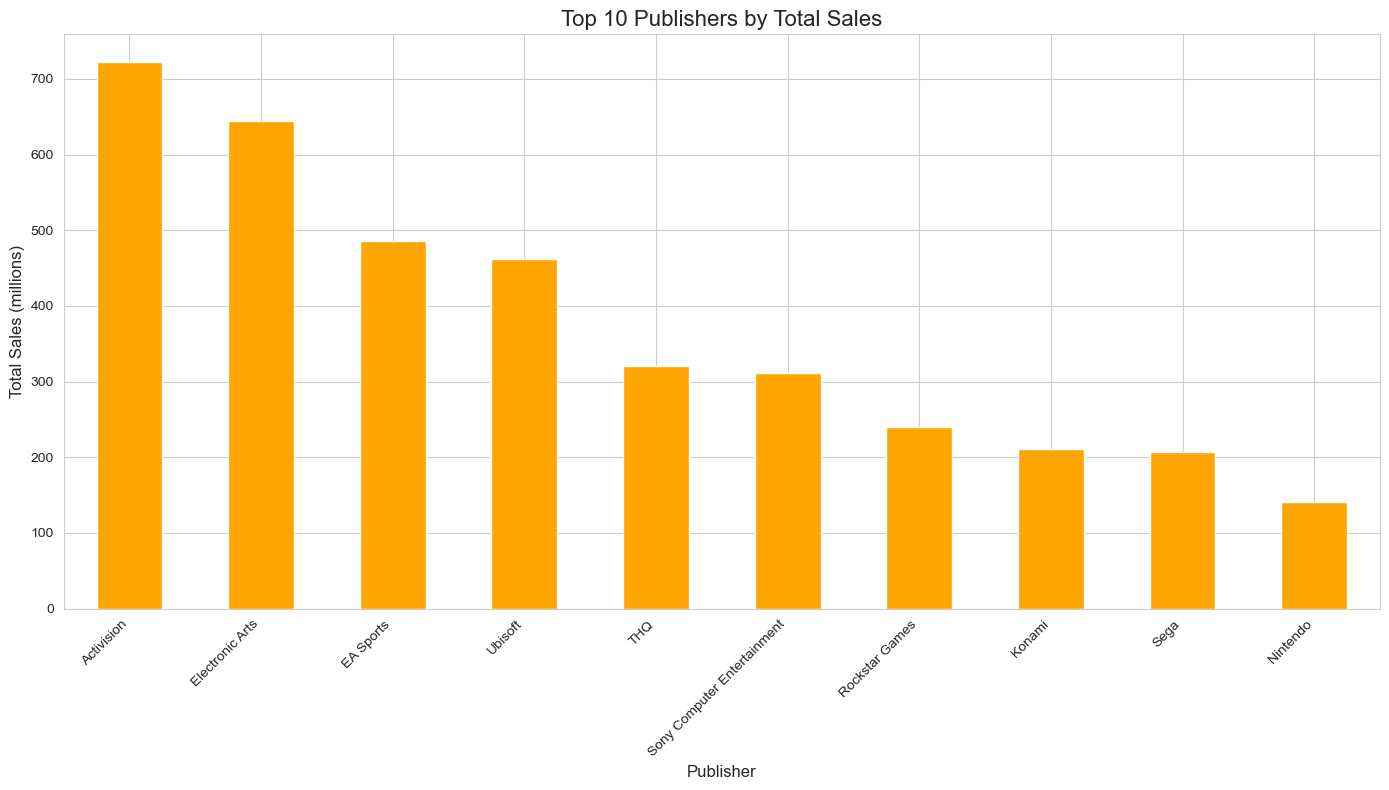

In [34]:
# 5. Additional visualization - Top publishers by sales
plt.figure(figsize=(14, 8))
top_publishers = df.groupby('publisher')['total_sales'].sum().nlargest(10)
top_publishers.plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Total Sales', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

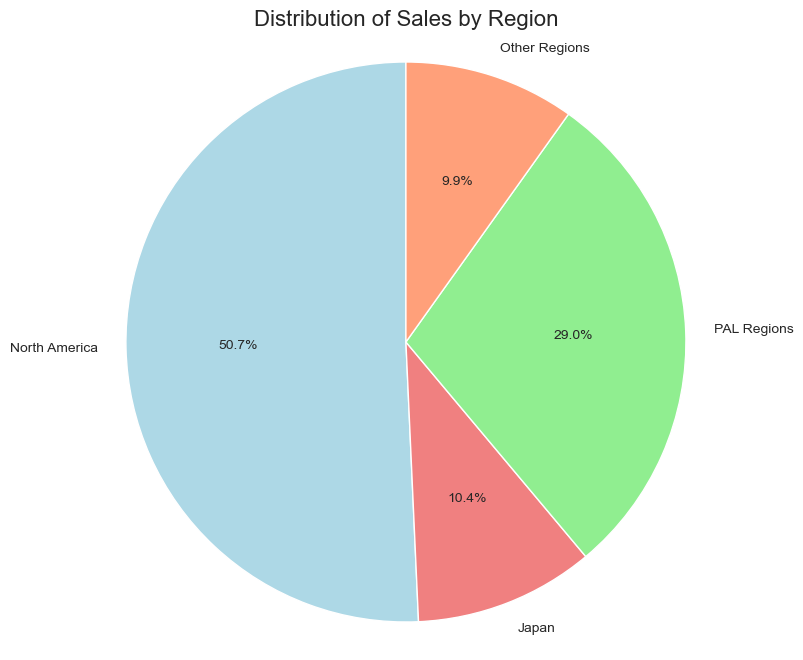

In [35]:
# 6. Additional visualization - Regional sales distribution
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
region_totals = [df[region].sum() for region in regions]
region_labels = ['North America', 'Japan', 'PAL Regions', 'Other Regions']

plt.figure(figsize=(10, 8))
plt.pie(region_totals, labels=region_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Distribution of Sales by Region', fontsize=16)
plt.axis('equal')
plt.show()

In [37]:
# ------------------------------------------
# Findings and Discoveries
# ------------------------------------------

summary = """
#  Conclusions and Key Discoveries

1. **Market Dominance**  
   Sales are heavily concentrated among a few blockbuster franchises (GTA, Call of Duty) and popular genres (Sports, Action, Shooter).

2. **Console Legacy**  
   The PS2, Xbox 360, and PS3 era represents the peak of physical video game sales, showing the dominance of that generation.

3. **Critics vs. Consumers**  
   There is only a weak positive correlation (~0.16) between critic scores and sales. Critical acclaim does not strongly drive commercial success.

4. **Data Limitations**  
   Many games have missing critic and sales data, which biases results towards the most popular tracked titles.

5. **Regional Trends**  
   North America and Europe dominate video game sales, while Japan contributes significantly less for these genres.

6. **Modern Blockbusters**  
   Physical sales declined after 2008 (likely due to digital distribution), but modern AAA titles still achieve massive global success.
"""

# Print the summary for notebook readability
print(summary)



#  Conclusions and Key Discoveries

1. **Market Dominance**  
   Sales are heavily concentrated among a few blockbuster franchises (GTA, Call of Duty) and popular genres (Sports, Action, Shooter).

2. **Console Legacy**  
   The PS2, Xbox 360, and PS3 era represents the peak of physical video game sales, showing the dominance of that generation.

3. **Critics vs. Consumers**  
   There is only a weak positive correlation (~0.16) between critic scores and sales. Critical acclaim does not strongly drive commercial success.

4. **Data Limitations**  
   Many games have missing critic and sales data, which biases results towards the most popular tracked titles.

5. **Regional Trends**  
   North America and Europe dominate video game sales, while Japan contributes significantly less for these genres.

6. **Modern Blockbusters**  
   Physical sales declined after 2008 (likely due to digital distribution), but modern AAA titles still achieve massive global success.

